### Importação dos dados



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [6]:
# Comparando o total do faturamento entre as lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = [
    loja1['Preço'].sum(),
    loja2['Preço'].sum(),
    loja3['Preço'].sum(),
    loja4['Preço'].sum()
]

faturamento = pd.Series(valores, index=lojas)

print('Faturamento por Loja:\n')
print(faturamento)


Faturamento por Loja:

Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
dtype: float64


# 2. Vendas por Categoria

In [16]:
vendas_categoria_por_loja = {}

for i, loja_df in enumerate([loja1, loja2, loja3, loja4]):
    store_name = f'Loja {i+1}'
    vendas_categoria_por_loja[store_name] = loja_df['Categoria do Produto'].value_counts()

vendas_por_categoria_df = pd.DataFrame(vendas_categoria_por_loja).fillna(0).astype(int)

print('Vendas por Categoria por Loja:\n')
print(vendas_por_categoria_df)

Vendas por Categoria por Loja:

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


# 3. Média de Avaliação das Lojas


In [ ]:
import pandas as pd

# Exemplo de dados inspirados na imagem
dados = {
    'Local da compra': ['SP', 'RJ', 'DF', 'RS', 'MG'],
    'Avaliação da compra': [4, 1, 1, 4, 5]
}

df = pd.DataFrame(dados)

# Calcula a média da avaliação por loja
avaliacao_media_loja = df.groupby('Local da compra')['Avaliação da compra'].mean().reset_index()

print(avaliacao_media_loja)


  Local da compra  Avaliação da compra
0              DF                  1.0
1              MG                  5.0
2              RJ                  1.0
3              RS                  4.0
4              SP                  4.0


# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd


dados = {
    'Produto': ['Assistente virtual', 'Mesa de jantar', 'Jogo de tabuleiro', 'Micro-ondas', 'Cadeira de escritório'],
    'Categoria do Produto': ['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos', 'moveis'],
    'Local da compra': ['SP', 'RJ', 'DF', 'RS', 'MG']
}

df = pd.DataFrame(dados)


categoria_por_loja = df.groupby(['Local da compra', 'Categoria do Produto']).size().reset_index(name='Quantidade')

print(categoria_por_loja)


  Local da compra Categoria do Produto  Quantidade
0              DF           brinquedos           1
1              MG               moveis           1
2              RJ               moveis           1
3              RS     eletrodomesticos           1
4              SP          eletronicos           1


# 5. Frete Médio por Loja

In [7]:
# Calculando o valor médio do frete por loja
frete_media = pd.DataFrame({'Loja 1': [loja1['Frete'].mean().round(2)],
                            'Loja 2': [loja2['Frete'].mean().round(2)],
                            'Loja 3': [loja3['Frete'].mean().round(2)],
                            'Loja 4': [loja4['Frete'].mean().round(2)]},
                                index=['Frete Médio'])

frete_media

,Loja 1,Loja 2,Loja 3,Loja 4
Frete Médio,34.69,33.62,33.07,31.28


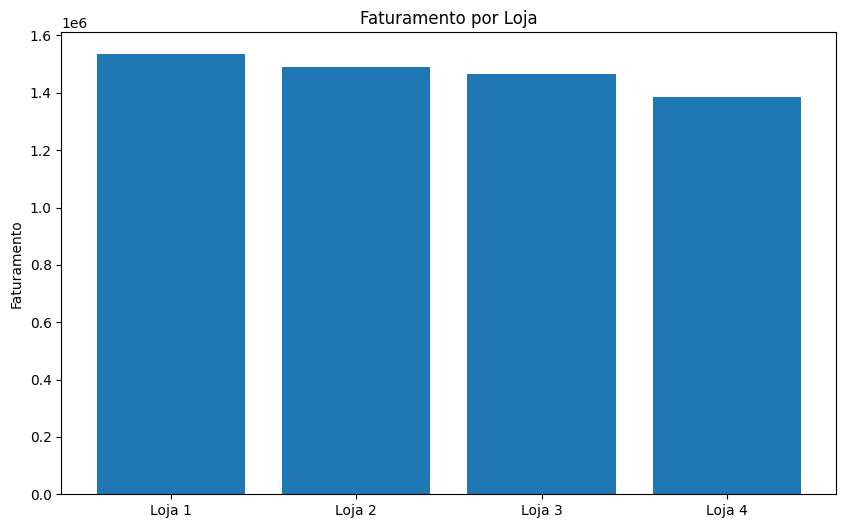

In [14]:
import matplotlib.pyplot as plt

# Gráfico comparativo do faturamento das lojas
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(faturamento.index, faturamento.values)
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento')
plt.show()

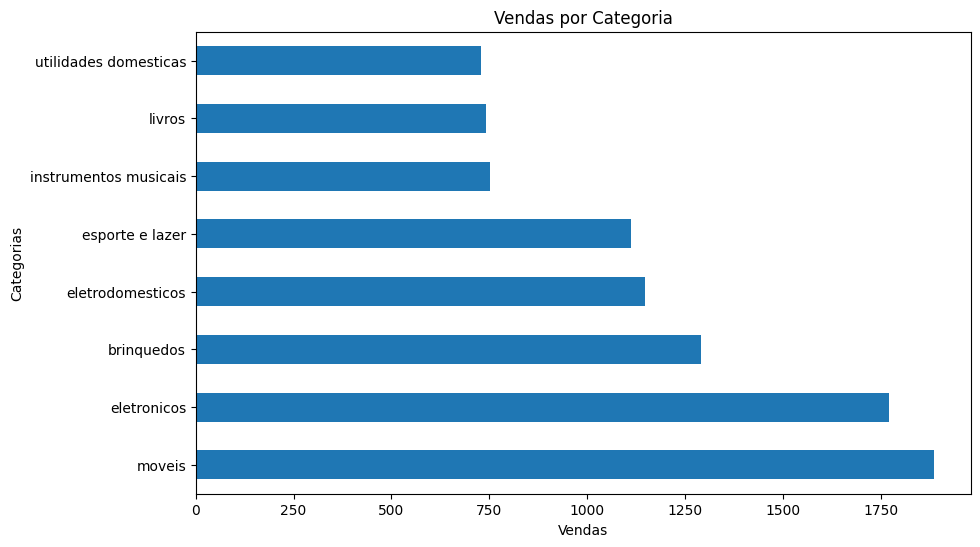

In [18]:
# Gráfico de venda por categoria de produtos
vendas_por_categoria = pd.concat([loja1, loja2, loja3, loja4])['Categoria do Produto'].value_counts()
vendas_por_categoria.plot(kind='barh', figsize=(10, 6))
plt.title('Vendas por Categoria')
plt.xlabel('Vendas')
plt.ylabel('Categorias')
plt.show()

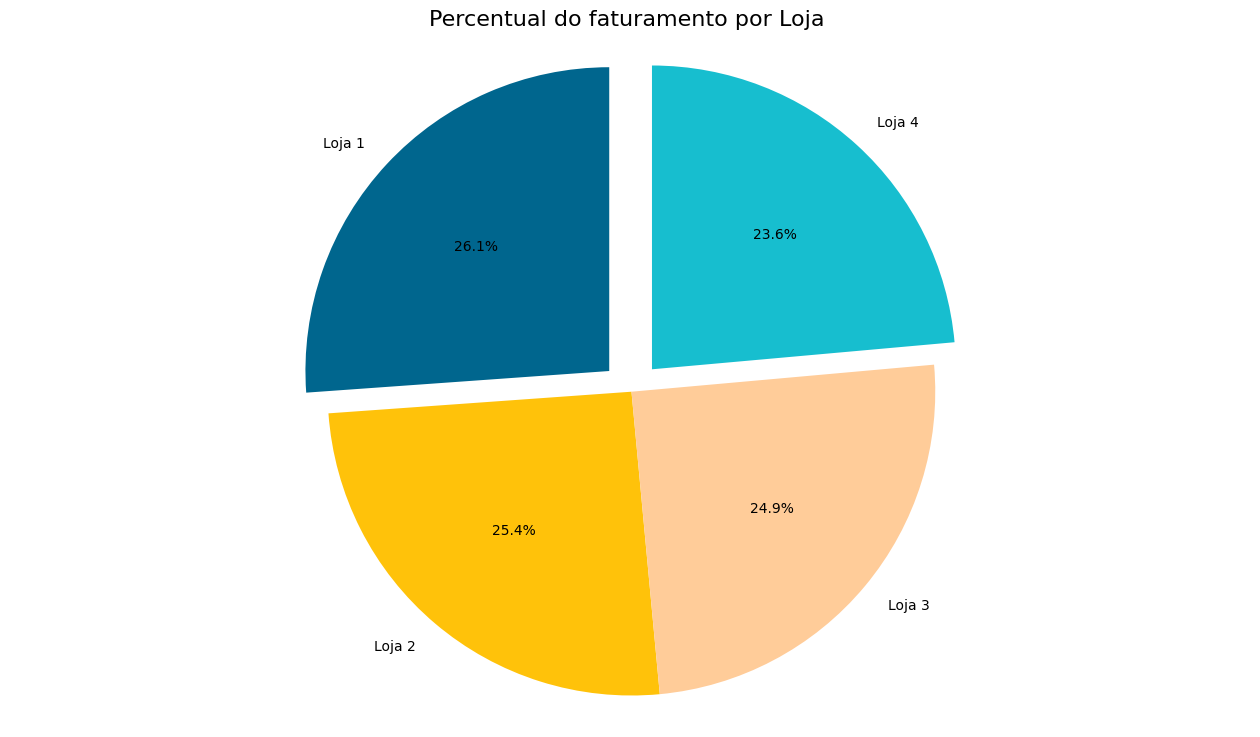

In [17]:
# Gráfico de Pizza com o percentual de faturamento de cada loja
# Destacando o Maior e Menor faturamento

fig, ax = plt.subplots(figsize=(16, 9))
cores = ['#00668E','#FFC20A','#ffcc99','#17BECF']
explodir = [0.1, 0.0, 0, 0.1]
ax.pie(faturamento, labels=lojas, autopct='%1.1f%%', startangle=90, colors=cores, explode=explodir,)
ax.axis('equal')
ax.set_title('Percentual do faturamento por Loja ', fontsize=16)
plt.show()